# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data
Read the train dataset in to a pandas dataframe

In [57]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

<AxesSubplot:>

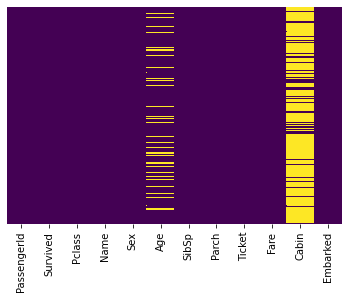

In [58]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

<AxesSubplot:>

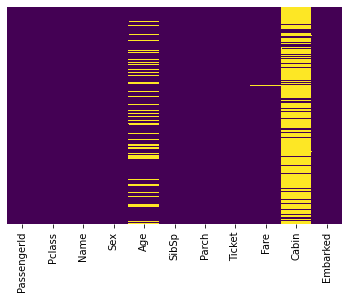

In [59]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

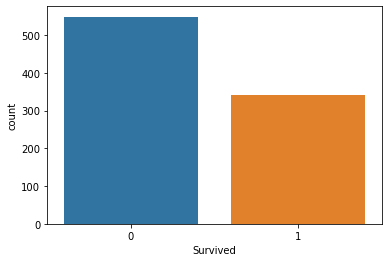

In [60]:
sns.countplot(x = 'Survived', data = train_df)

Create a histogram for the target variable "Survived" for males and females. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

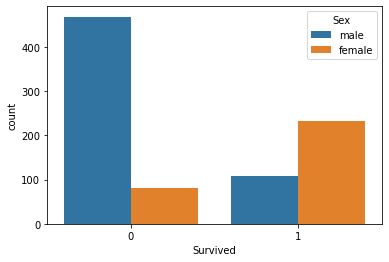

In [61]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_df)

Create a histogram for the  "Pclass" feature.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

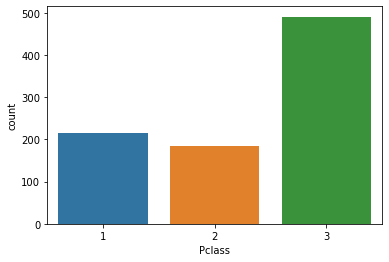

In [62]:
sns.countplot(x = 'Pclass', data = train_df)

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin column and all the rows where the feature Emkarked is NaN. 

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
train_df = train_df.drop(['Cabin'], axis = 1)
train_df = train_df.dropna(subset = ['Embarked'])

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df = test_df.drop(['Cabin'], axis = 1)
test_df = test_df.dropna(subset = ['Embarked', 'Fare'])  #There is one NaN value in the fare column so I just dropped it

In [65]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [66]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [67]:
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns = ['Sex', 'Embarked'])

In [68]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [69]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


# Logistic Regression Model
## Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['Survived'], axis = 1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [71]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = "liblinear")
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [72]:
predictions = logmodel.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.67      0.60      0.63        83

    accuracy                           0.78       267
   macro avg       0.75      0.73      0.74       267
weighted avg       0.78      0.78      0.78       267



In [74]:
logmodel.predict(test_df)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Support Vector Machines

## Train a Support Vector Classifier

In [75]:
from sklearn.svm import SVC

## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[.1, 1, 10, 100], 'gamma':[1, .1, .01, .001]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [77]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       184
           1       0.60      0.59      0.60        83

    accuracy                           0.75       267
   macro avg       0.71      0.71      0.71       267
weighted avg       0.75      0.75      0.75       267



In [78]:
grid.predict(test_df)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


For predicting if a passenger died, the logistic regression had a precision (correct positive predictions out of all total positive predictions) of .83, a recall (correct positive predictions out of all actual positives) of .86, and an f1-score (harmonic mean of precision and recall) of .85. When looking at the model's performance in predicting if a passenger survived, the logistic regression scored .67, .60, and .63 respectively. Now, looking at the SVM, it scored .82, .83, and .82 respectively for predicting if a passenger died and .60, .59, and .60 respectively for predicting if a passenger survived.

As we can see, the logistic regression performs slightly better than the SVM in all areas. However, we shouldn't necessarily say that the logistic regression is a better model as the small difference in performance could be do to factors such as the way data was split between the training and testing sets. Using methods such as cross-validation, which does multiple train/test splits and creates a model for each split, could give us a better picture of which model is a better performer.